In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data_set=pd.read_csv('../dataset/cleaned_pneumonia_blood_dataset.csv')
data_set.drop('Unnamed: 0',axis=1,inplace=True)
data_set.head()

,Patient_ID,Age,Gender,White_Blood_Cell_Count,CRP_Level,Procalcitonin_Level,ESR_Level,Diagnosis,Cough,Shortness of Breath,Chest Pain,Chills,Fatigue,Productive Cough
0,1,48,Male,9261,6.10,0.34,23,0,0,1,1,0,0,0
1,2,21,Male,10200,8.17,0.28,17,0,0,0,0,1,1,1
2,3,62,Female,14957,17.31,0.81,21,0,1,0,0,0,1,0
3,4,59,Female,12014,7.86,0.36,29,1,1,1,1,1,0,0
4,5,43,Female,13237,7.96,0.47,30,0,0,0,0,1,0,0


In [36]:
#loading dataset
X,y=data_set.drop(['Patient_ID','Diagnosis','Gender'],axis=1),data_set['Diagnosis']
# splitting dataset into training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) 

>**Model selection** 

**Logistic Regression**

In [37]:
reg_model=LogisticRegression(max_iter=1000)
reg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
# Prediction
y_pred = reg_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 80.80438756855575


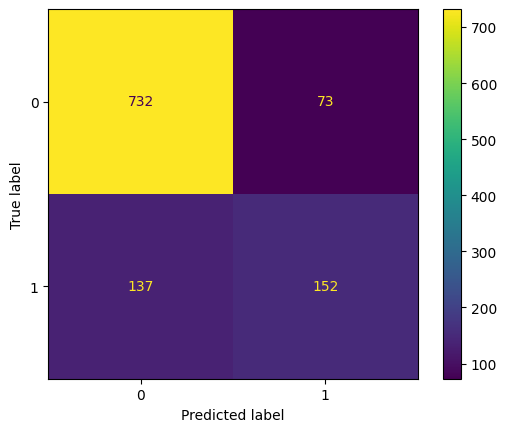

In [47]:
confusion_matrix_reg=confusion_matrix(y_test,y_pred,labels=reg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_reg,display_labels=reg_model.classes_)
disp.plot()

**Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeRegressor  
DecisionTree_model = DecisionTreeRegressor(max_leaf_nodes=10000)  
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10000)

In [53]:
y_pred = DecisionTree_model.predict(X_test) 
print(f"Predicted price: {accuracy_score(y_test, y_pred)*100}")  

Predicted price: 85.92321755027422


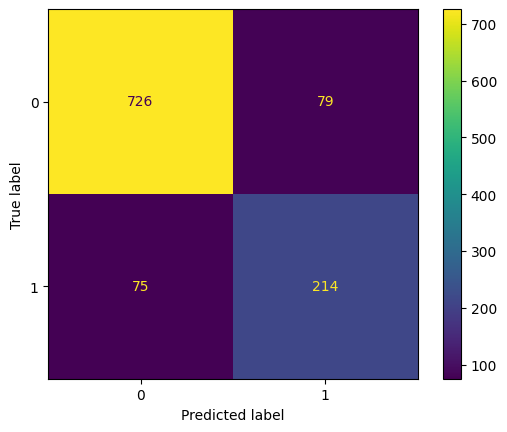

In [56]:
confusion_matrix_decision_tree=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_decision_tree)
disp.plot()

**Random Forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(max_leaf_nodes=100000)
Rfc.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=100000)

In [58]:
y_pred = Rfc.predict(X_test)
print(f"Predicted price: {accuracy_score(y_test, y_pred)*100}") 

Predicted price: 87.84277879341865


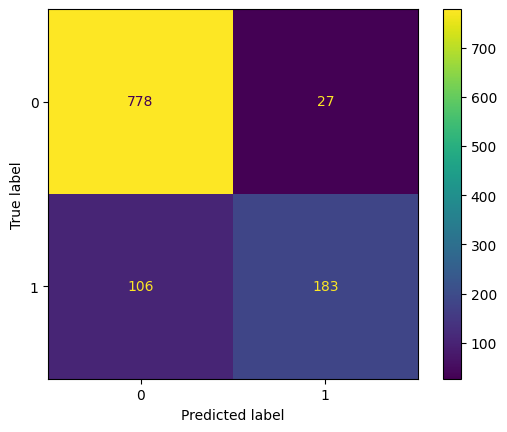

In [59]:
confusion_matrix_Rfc=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_Rfc)
disp.plot()

In [61]:
#saving all the models
import pickle
pickle.dump(reg_model,file=open('./models/Logistic_Regression_model.pkl','wb'))
pickle.dump(reg_model,file=open('./models/DecisionTree_model.pkl','wb'))
pickle.dump(reg_model,file=open('./models/RandomForest__model.pkl','wb'))